### Cloning quasars  

Using SDSS sample of galaxies:
- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one.
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation? (Hint: It shouldn't. But why?)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import fetch_dr7_quasar
from scipy.optimize import curve_fit
from astropy.cosmology import Planck15
from scipy.stats import rv_histogram
from scipy import stats, interpolate
import scipy

Text(0.5, 1.0, 'Redshift data from SDSS')

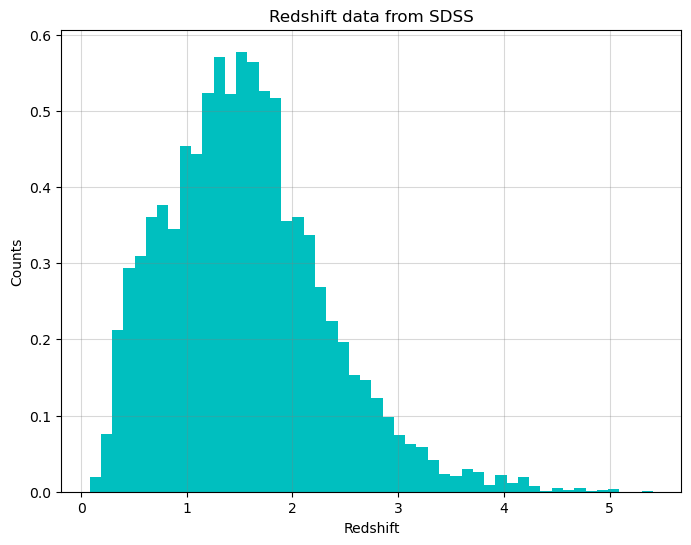

In [2]:
#Fetch the quasar data
data = fetch_dr7_quasar()

#Select the first 10000 points
data = data[:10000]

#Select the redshifts
z = data['redshift']

nbins = 50

#Plot of redshifts
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.hist(z, bins = nbins, density = True, color = 'c', histtype = 'stepfilled', label = 'SDSS data')
ax.grid(alpha=0.3, c = 'grey')
ax.set_xlabel('Redshift')
ax.set_ylabel('Counts')
ax.set_title('Redshift data from SDSS')

## Rejection sampling

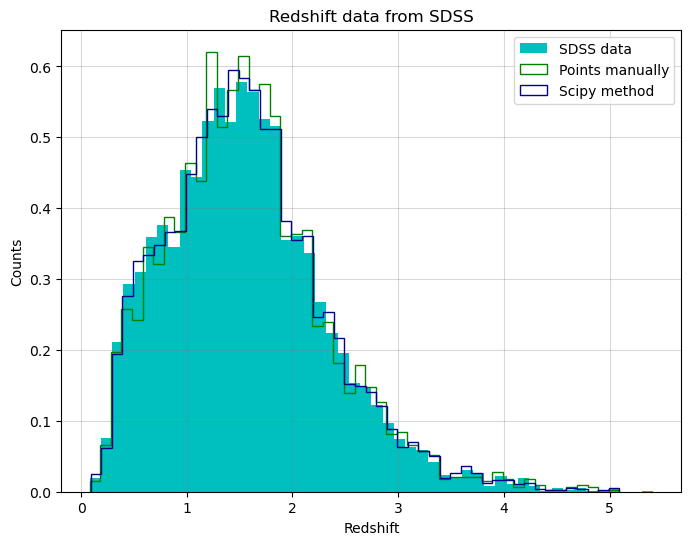

In [14]:
N = 10000

histogram = np.histogram(z, bins = nbins) #Histogram of the redshifts
distr = rv_histogram(histogram) #Generates a distribution given by a histogram. 

x = np.linspace(min(z), max(z), nbins) 

#Generation of uniform distributions on x and y 
x_unif = np.random.uniform(min(x), max(x), N)
y_unif = np.random.uniform(min(distr.pdf(x)), max(distr.pdf(x)), N)

#Histogram 
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.hist(z, bins = nbins, density = True, color = 'c', histtype = 'stepfilled', label = 'SDSS data')
ax.grid(alpha=0.3, c = 'grey')
ax.set_xlabel('Redshift')
ax.set_ylabel('Counts')
ax.set_title('Redshift data from SDSS')

#Selection of the points under the function of the histogram
good_points = x_unif[y_unif < distr.pdf(x_unif)]

ax.hist(good_points, bins = nbins, density = True, color = 'green', histtype = 'step', label='Points manually')

#Using scipy
ax.hist(distr.rvs(size=N), bins=nbins, density=True, histtype='step', label='Scipy method', color = 'darkblue');

ax.legend()

## Inverse trasforming sample

Text(0.5, 1.0, 'Redshift data from SDSS')

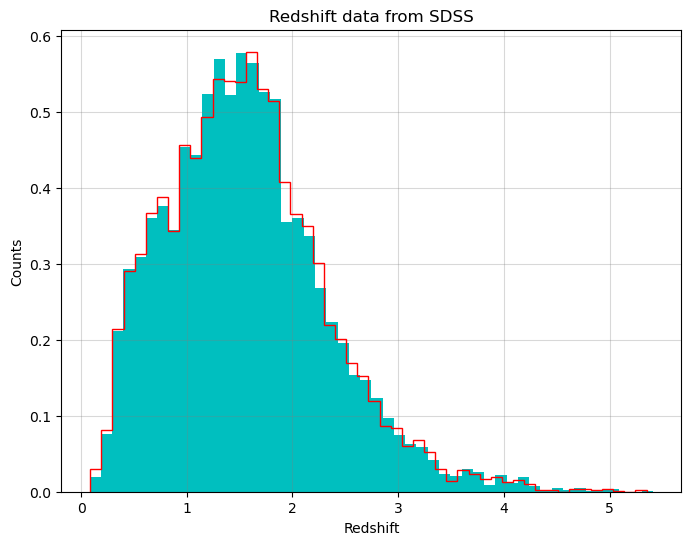

In [15]:
#Draw samples from a uniform distribution
u = np.random.uniform(0, 1, len(z))

#Inverse of the cdf 
x_sample = distr.ppf(u)  

#Plot
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.gca()
ax1.hist(z, bins = nbins, density = True, color = 'c', histtype = 'stepfilled', label = 'SDSS data')
ax1.hist(x_sample, bins=nbins, color = 'red', histtype='step', density = True)
ax1.grid(alpha=0.3, c = 'grey')
ax1.set_xlabel('Redshift')
ax1.set_ylabel('Counts')
ax1.set_title('Redshift data from SDSS')

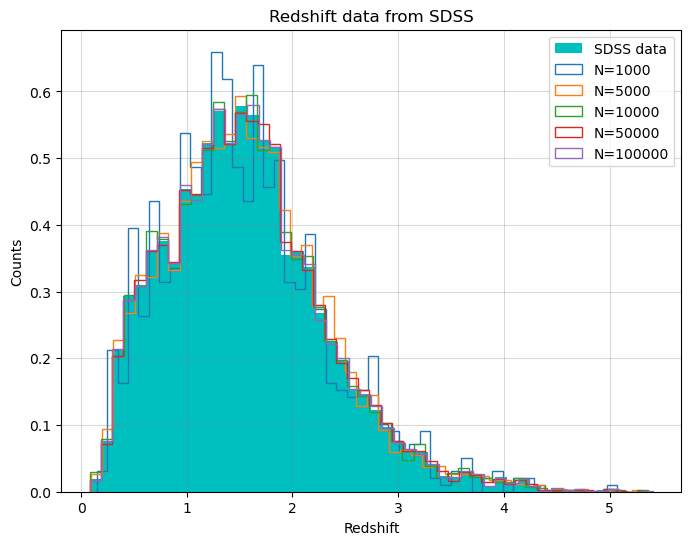

In [35]:
#What happens if I increase N?
fig2 = plt.figure(figsize=(8,6))
ax2 = fig2.gca()
ax2.hist(z, bins = nbins, density = True, color = 'c', histtype = 'stepfilled', label = 'SDSS data')
ax2.grid(alpha=0.3, c = 'grey')
ax2.set_xlabel('Redshift')
ax2.set_ylabel('Counts')
ax2.set_title('Redshift data from SDSS')

#Using scipy
for i in [1000, 5000, 10000, 50000, 100000]:
    ax2.hist(distr.rvs(size=i), bins=nbins, density=True, histtype='step', label='N='+str(i));

ax2.legend()


As we expect, by increasing the value of N, the cloned data become more and more similar to the original sample

In [36]:
import astropy
astropy.cosmology.Planck18

FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897)

We assume that quasars are distributed uniformly in comoving volume in the Universe.

In [38]:
#Define a new class and their methods 
class uniformredshift(object):
    def __init__(self,zmax):
        ''' Lazy loading...'''
        self._norm = None
        self._pdfmax = None
        self.zmax=zmax

    def _eval(self,z_vals):
        '''Unnormalized pdf'''
        return ((4.*np.pi*astropy.cosmology.Planck18.differential_comoving_volume(z_vals).value))


    def norm(self):
        '''Compute normalization'''
        if self._norm is None:
            self._norm = scipy.integrate.quad( self._eval, 0, self.zmax)[0]
        return self._norm


    def eval(self, z_vals):
        return self._eval(z_vals)/self.norm()

        return np.array(zsample)

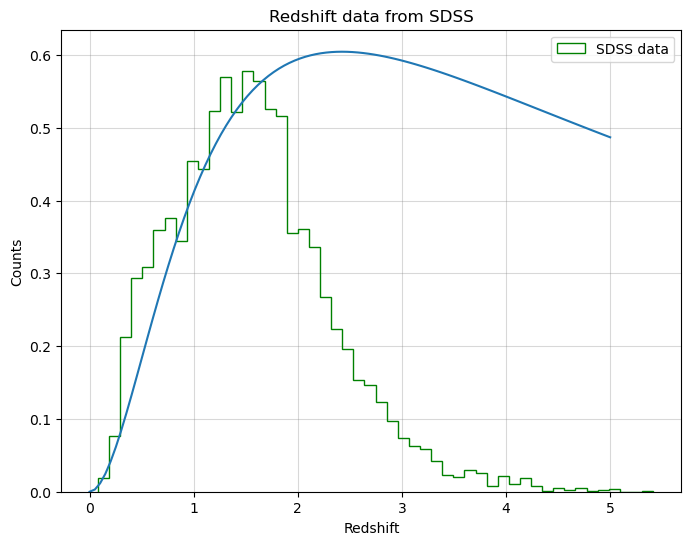

In [46]:
fig3 = plt.figure(figsize=(8,6))
ax3 = fig3.gca()
ax3.hist(z, bins = nbins, density = True, color = 'green', histtype = 'step', label = 'SDSS data')
ax3.grid(alpha=0.3, c = 'grey')
ax3.set_xlabel('Redshift')
ax3.set_ylabel('Counts')
ax3.set_title('Redshift data from SDSS')

redshiftpdf = uniformredshift(zmax = 5)

w = np.linspace(0, 5, 100)
ax3.plot(w, 2.4*redshiftpdf.eval(w)) ###   Arbitrary normalization, just matching by eye
ax3.legend()